In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the dataset
df = pd.read_csv("C:/Users/91976/DataScience Projects/bengaluru_house_prices.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# Data Preprocessing

In [3]:
df.shape

(13320, 9)

In [4]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
df = df.drop(['area_type', 'availability', 'society'], axis = 'columns')
df.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [6]:
df.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [7]:
df['balcony'] = df['balcony'].fillna(df['balcony'].mean())
df.isnull().sum()        

location       1
size          16
total_sqft     0
bath          73
balcony        0
price          0
dtype: int64

In [8]:
df = df.dropna()
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [9]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [10]:
df['BHK'] = df['size'].apply(lambda x: int(x.split(' ')[0]))
df.head()

,location,size,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [11]:
df = df.drop(['size'], axis = 'columns')
df.head()

,location,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Kothanur,1200,2.0,1.0,51.00,2


In [12]:
df['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [13]:
df[df.BHK > 20]

,location,total_sqft,bath,balcony,price,BHK
1718,2Electronic City Phase II,8000,27.0,0.0,230.0,27
4684,Munnekollal,2400,40.0,0.0,660.0,43


In [14]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [15]:
def is_float(x):
    try: 
        float(x)
    except:
        return False
    return True

In [16]:
df[~df['total_sqft'].apply(is_float)].head(60)

,location,total_sqft,bath,balcony,price,BHK
30,Yelahanka,2100 - 2850,4.0,0.000000,186.000,4
122,Hebbal,3067 - 8156,4.0,0.000000,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,0.000000,54.005,2
165,Sarjapur,1145 - 1340,2.0,0.000000,43.490,2
188,KR Puram,1015 - 1540,2.0,0.000000,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,0.000000,18.500,1
549,Hennur Road,1195 - 1440,2.0,0.000000,63.770,2
648,Arekere,4125Perch,9.0,1.584376,265.000,9
661,Yelahanka,1120 - 1145,2.0,0.000000,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,0.000000,445.000,4


In [19]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except:
        return None
        

In [20]:
df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)

In [23]:
df.isnull().sum()

location       0
total_sqft    46
bath           0
balcony        0
price          0
BHK            0
dtype: int64

In [24]:
df = df.dropna()
df.isnull().sum()

location      0
total_sqft    0
bath          0
balcony       0
price         0
BHK           0
dtype: int64

In [25]:
df['price'] = df['price'] * 100000
df.head()

,location,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,1056.0,2.0,1.0,3907000.0,2
1,Chikka Tirupathi,2600.0,5.0,3.0,12000000.0,4
2,Uttarahalli,1440.0,2.0,3.0,6200000.0,3
3,Lingadheeranahalli,1521.0,3.0,1.0,9500000.0,3
4,Kothanur,1200.0,2.0,1.0,5100000.0,2


In [26]:
df['price_per_sqft'] = df['price'] / df['total_sqft']
df.head()

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,3907000.0,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,12000000.0,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,6200000.0,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,9500000.0,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,5100000.0,2,4250.000000


In [27]:
df['location'].nunique()

1298

In [30]:
df.location = df.location.apply(lambda x: x.strip())
loc_stats = df.groupby('location')['location'].agg('count').sort_values(ascending = False)
loc_stats

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [34]:
len(loc_stats[loc_stats <= 15])

1107

In [35]:
loc_less_than_15 = loc_stats[loc_stats <= 15]
df.location = df.location.apply(lambda x: 'other' if x in loc_less_than_15 else x)
len(df.location.unique())

181

# Outlier Removal

In [36]:
df[df.total_sqft / df.BHK < 300]

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
9,other,1020.0,6.0,1.584376,37000000.0,6,36274.509804
45,HSR Layout,600.0,9.0,1.584376,20000000.0,8,33333.333333
58,other,1407.0,4.0,1.000000,15000000.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,0.000000,8500000.0,8,6296.296296
70,other,500.0,3.0,2.000000,10000000.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,other,1400.0,7.0,1.584376,21800000.0,7,15571.428571
13279,other,1200.0,5.0,1.584376,13000000.0,6,10833.333333
13281,Margondanahalli,1375.0,5.0,1.000000,12500000.0,5,9090.909091
13303,Vidyaranyapura,774.0,5.0,3.000000,7000000.0,5,9043.927649


In [37]:
df.shape

(13200, 7)

In [38]:
df1 = df[~(df.total_sqft / df.BHK < 300)]
df1.shape

(12456, 7)

In [39]:
df1.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [42]:
def remove_outlier(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        sd = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m - sd)) & (subdf.price_per_sqft < (m + sd))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out


df1 = remove_outlier(df1)
df1.shape

(10358, 7)

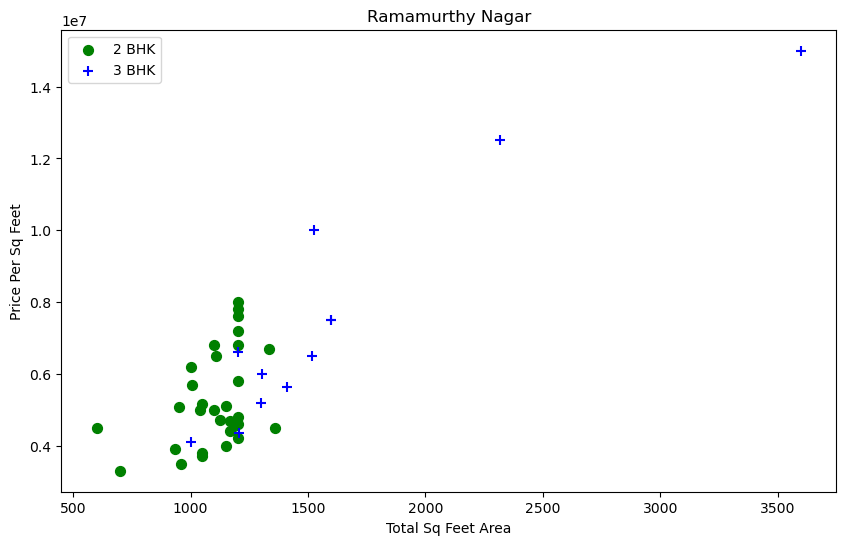

In [51]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.BHK == 2)]
    bhk3 = df[(df.location == location) & (df.BHK == 3)]
    plt.rcParams['figure.figsize'] = (10, 6)
    plt.scatter(bhk2.total_sqft, bhk2.price, color = 'green', label = '2 BHK', s = 50)
    plt.scatter(bhk3.total_sqft, bhk3.price, color = 'blue', marker = '+', label = '3 BHK', s = 50)
    plt.xlabel("Total Sq Feet Area")
    plt.ylabel("Price Per Sq Feet")
    plt.title(location)
    plt.legend()


plot_scatter_chart(df1, 'Ramamurthy Nagar')

In [52]:
def remove_bhk_outlier(df):
    # An empty array to hold the indices of rows to remove
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        # bhk_stats will hold mean, std, and count of price_per_sqft for each BHK level within a location.
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        # Compare BHK levels to the one just below for the same location
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk - 1)
            # Requiring at least 5 samples for comparison.
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis = 'index')


df1 = remove_bhk_outlier(df1)
df1.shape

(7127, 7)

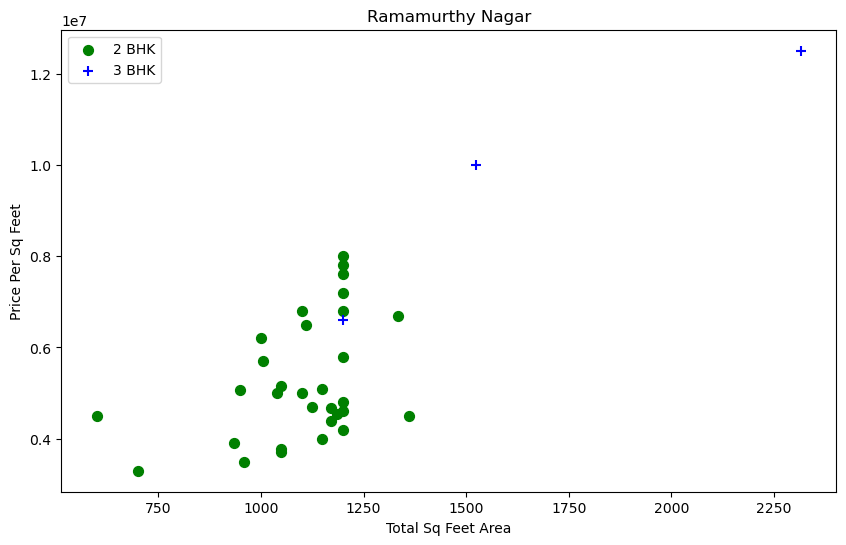

In [53]:
plot_scatter_chart(df1, 'Ramamurthy Nagar')

Text(0, 0.5, 'Count')

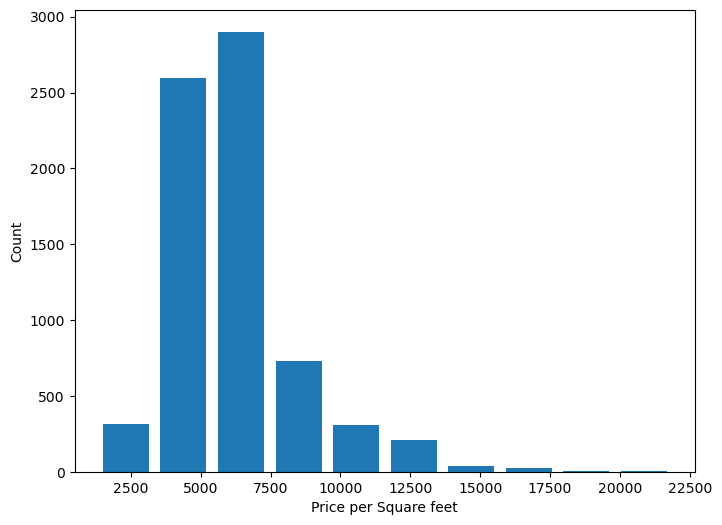

In [54]:
plt.figure(figsize = (8, 6))
plt.hist(df1.price_per_sqft, rwidth = 0.8)
plt.xlabel('Price per Square feet')
plt.ylabel('Count')

In [55]:
df1.bath.unique()

array([ 3.,  5.,  4.,  2.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [56]:
df1[df1.bath > df1.BHK + 2]

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
6260,Thanisandra,1806.0,6.0,2.000000,11600000.0,3,6423.034330
8031,other,11338.0,9.0,1.000000,100000000.0,6,8819.897689
9923,other,7000.0,8.0,1.584376,45000000.0,4,6428.571429


In [57]:
df1 = df1.drop(df1[df1.bath > df1.BHK + 2].index)
df1.shape

(7124, 7)

In [58]:
df1 = df1.drop('price_per_sqft', axis = 'columns')
df1.head()

,location,total_sqft,bath,balcony,price,BHK
1,1st Phase JP Nagar,1875.0,3.0,1.000000,16700000.0,3
2,1st Phase JP Nagar,1500.0,5.0,1.584376,8500000.0,5
3,1st Phase JP Nagar,2065.0,4.0,1.000000,21000000.0,3
5,1st Phase JP Nagar,2059.0,3.0,2.000000,22500000.0,3
6,1st Phase JP Nagar,1394.0,2.0,1.000000,10000000.0,2


# Data Encoding

In [59]:
def encoder(df, cols):
    # Import The One Hot Encoder library
    from sklearn.preprocessing import OneHotEncoder
    ohe = OneHotEncoder(drop = 'first', sparse_output = False)
    
    # Transfrom the columns to be encoded in the from of array
    ohe_array = ohe.fit_transform(df[cols])
    
    # Get the column name out
    ohe_cols_name = ohe.get_feature_names_out(cols)
    
    # Convert the array into a Data Frame
    encoded_df = pd.DataFrame(ohe_array, columns = ohe_cols_name, index = df.index)

    # Drop the original columns
    df = df.drop(cols, axis = 'columns')

    # Concat the new columns into the original Data Frame
    df = pd.concat([df, encoded_df], axis = 'columns')
    return df

cols = ['location']
df2 = encoder(df = df1, cols = cols)
df2.head()

,total_sqft,bath,balcony,price,BHK,location_2nd Stage Nagarbhavi,location_5th Phase JP Nagar,location_6th Phase JP Nagar,location_7th Phase JP Nagar,location_8th Phase JP Nagar,...,location_Varthur,location_Vidyaranyapura,location_Vijayanagar,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yeshwanthpur,location_other
1,1875.0,3.0,1.000000,16700000.0,3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1500.0,5.0,1.584376,8500000.0,5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2065.0,4.0,1.000000,21000000.0,3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2059.0,3.0,2.000000,22500000.0,3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1394.0,2.0,1.000000,10000000.0,2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
df2.shape

(7124, 185)

# Model Selection

In [61]:
X = df2.drop('price', axis = 'columns')
y = df2.price

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [63]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.869838626279648

In [64]:
from sklearn.model_selection import ShuffleSplit, cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
scores = cross_val_score(LinearRegression(), X, y, cv = cv)
scores.mean()

0.8279015781445949

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [66]:
def best_model_search(X, y):
    model_params = {
    'lasso': {
        'model': Lasso(), 
        'params': {
            'alpha': [1, 2],
            'selection': ['random', 'cyclic']
                }
        },
    'Decision_tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion': ['mse', 'friedman_mse'],
            'splitter': ['best', 'random']
            }
        },
    'Random_forest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [100, 150, 200],
            'criterion': ['squared_error', 'friedman_mse']
                }
            }
        }
    scores = []
    cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
    for model_name, config in model_params.items():
        gs = GridSearchCV(config['model'], config['params'], cv = cv, return_train_score = False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores)


best_model_search(X, y)

C:\Users\91976\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.422e+16, tolerance: 4.374e+13
  model = cd_fast.enet_coordinate_descent(
C:\Users\91976\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.701e+16, tolerance: 3.936e+13
  model = cd_fast.enet_coordinate_descent(
C:\Users\91976\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.460e+16, toleranc

,model,best_score,best_params
0,lasso,0.827912,"{'alpha': 1, 'selection': 'random'}"
1,Decision_tree,0.781440,"{'criterion': 'friedman_mse', 'splitter': 'ran..."
2,Random_forest,0.824268,"{'criterion': 'squared_error', 'n_estimators':..."


# Prediction

In [77]:
X.columns

Index(['total_sqft', 'bath', 'balcony', 'BHK', 'location_2nd Stage Nagarbhavi',
       'location_5th Phase JP Nagar', 'location_6th Phase JP Nagar',
       'location_7th Phase JP Nagar', 'location_8th Phase JP Nagar',
       'location_9th Phase JP Nagar',
       ...
       'location_Varthur', 'location_Vidyaranyapura', 'location_Vijayanagar',
       'location_Vittasandra', 'location_Whitefield',
       'location_Yelachenahalli', 'location_Yelahanka',
       'location_Yelahanka New Town', 'location_Yeshwanthpur',
       'location_other'],
      dtype='object', length=184)

In [73]:
def prediction(location, sqft, bath, bhk):
    loc_col = 'location_' + location

    if loc_col in X.columns:
        loc_index = np.where(X.columns == loc_col)[0][0]
    else:
        loc_index = -1  # handle unknown location

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    predicted_price = lr.predict([x])[0]

    return f"{predicted_price:,.2f}"

In [74]:
prediction('1st Phase JP Nagar', 2400, 4, 6)

C:\Users\91976\Anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


'21,322,716.95'

In [76]:
prediction('Varthur', 1200, 3, 2)

C:\Users\91976\Anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


'6,291,458.03'

# Saving the model 

In [78]:
import pickle
with open('Banglore_housing_price_model.pickle', 'wb') as f:
    pickle.dump(lr, f)

In [79]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))